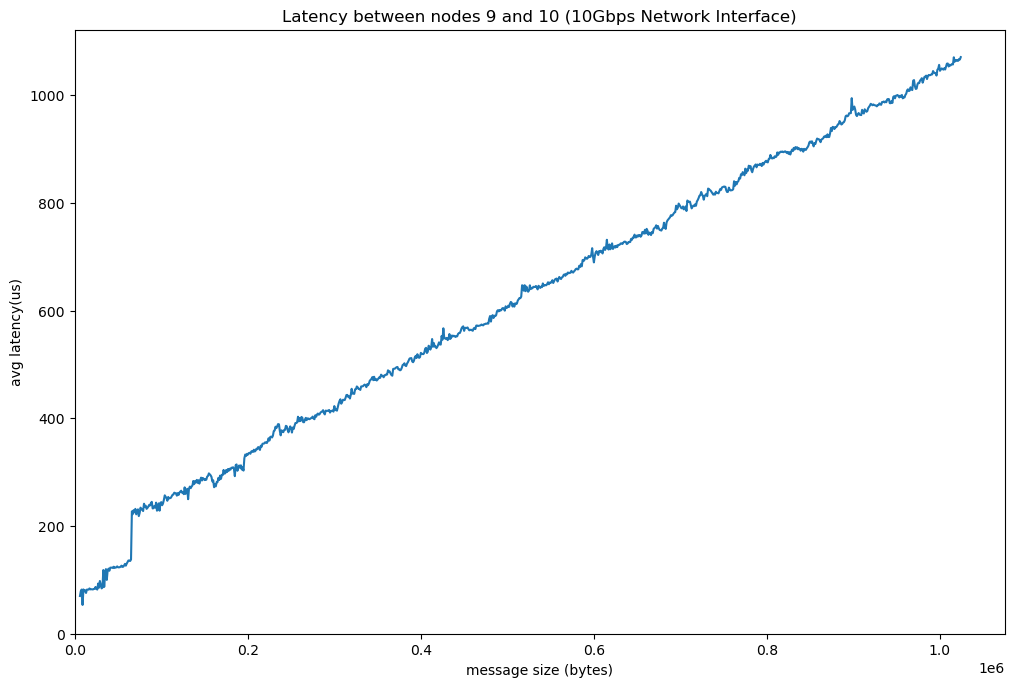

alpha=138.6022474746783
beta=0.0009206472558891672
estimated bandwidth=1086.1923430534678


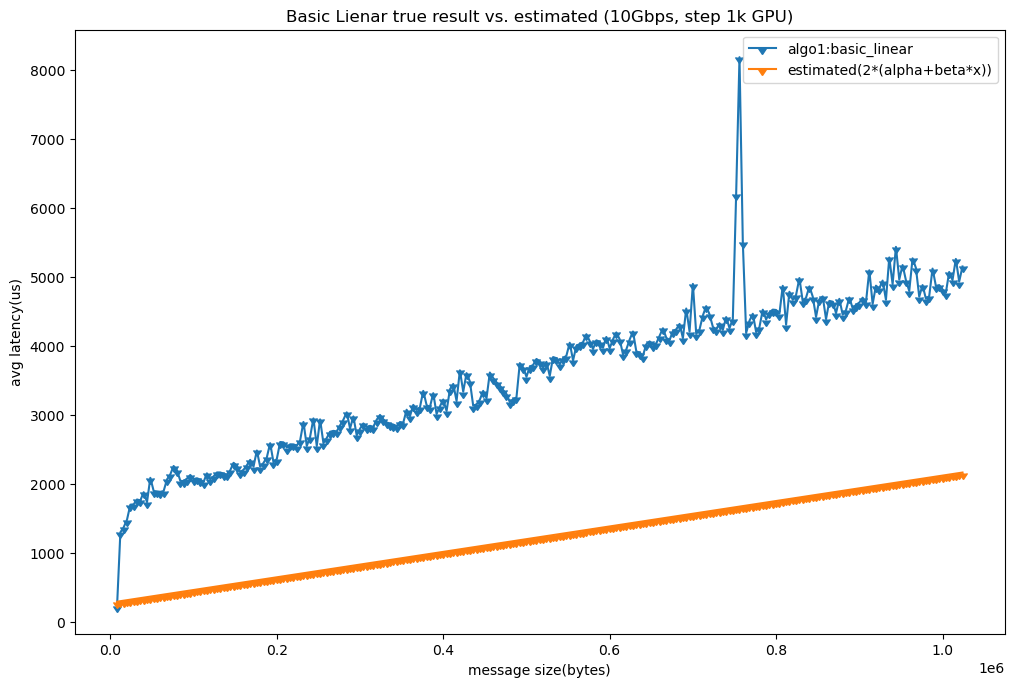

mse is:5879027.687686311


In [7]:
x = []
y = []

with open('data/lat-10g-step1k-modified.txt') as f:
    for _ in range(4):
        next(f)
    
    for i in f:
        num = i.split()
        x.append(float(num[0]))
        y.append(float(num[1]))
        
# print(x)
# print(y)
        
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

plt.plot(x, y)

plt.xlabel('message size (bytes)')
plt.ylabel('avg latency(us)')
plt.title('Latency between nodes 9 and 10 (10Gbps Network Interface)')
plt.ylim(0)
plt.xlim(0)

# plt.legend()
plt.savefig('imgs/lat-10g-step1k-modified.png')
plt.show()

slope, intercept = np.polyfit(x,y,1)
print("alpha="+str(intercept))
print("beta="+str(slope))
print("estimated bandwidth="+str(1/slope))




def read_algo_with_head(filename):
    x = []
    y = []

    with open(filename) as f:
        for _ in range(4):
            next(f)
    
        for line in f:
            num = line.split()
            x.append(num[0])
            y.append(num[1])

    x = np.array(x)
    y = np.array(y)

    return x.astype('float'), y.astype('float')

x, y1 = read_algo_with_head('data/gpus/10g-16cpu-algo1-step1k.txt')


plt.title('Basic Lienar true result vs. estimated (10Gbps, step 1k GPU)')
plt.xlabel('message size(bytes)')
plt.ylabel('avg latency(us)')

plt.plot(x, y1, label='algo1:basic_linear', marker=11)


# plt.legend()
# plt.show()


alpha = intercept
beta = slope


# reduce+braodcast
# x2 = [2**x for x in range(2,29)]
y2 = 2*(alpha+beta*x) # ignore computational cost per byte (+ np*message_size*gamma)

plt.plot(x, y2, label='estimated(2*(alpha+beta*x))', marker=11)
plt.legend()

plt.show()

mse = np.square(np.subtract(y1,y2)).mean() 
print('mse is:'+str(mse))

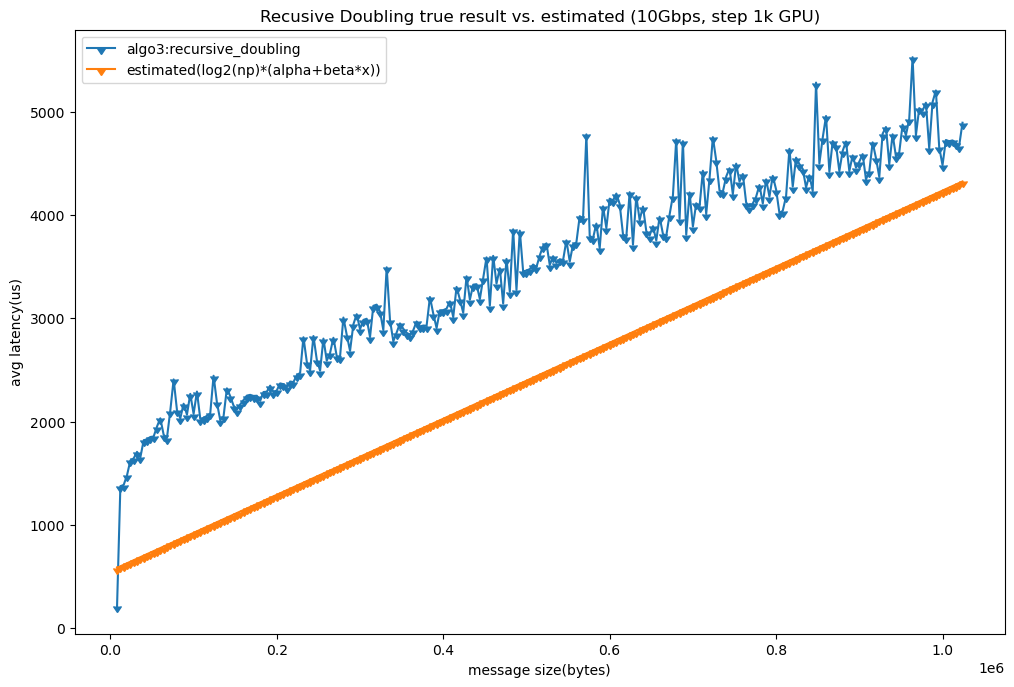

mse is:1108999.3074458814


In [8]:
x, y1 = read_algo_with_head('data/gpus/10g-16cpu-algo3-step1k.txt')


plt.title('Recusive Doubling true result vs. estimated (10Gbps, step 1k GPU)')
plt.xlabel('message size(bytes)')
plt.ylabel('avg latency(us)')

plt.plot(x, y1, label='algo3:recursive_doubling', marker=11)


# plt.legend()
# plt.show()


alpha = intercept
beta = slope


# # reduce+braodcast
# # x2 = [2**x for x in range(2,29)]
# y2 = 2*(alpha+beta*x) # ignore computational cost per byte (+ np*message_size*gamma)
num_processes=16

# # ring
# y2 = 2 * (num_processes-1) * (alpha+(x*beta)/num_processes) # ingore (num_processes-1)*(x*gamma/num_processes)

# recursive doubling
y2 = np.log2(num_processes)*(alpha+beta*x)

plt.plot(x, y2, label='estimated(log2(np)*(alpha+beta*x))', marker=11)
plt.legend()

plt.show()

mse = np.square(np.subtract(y1,y2)).mean() 
print('mse is:'+str(mse))

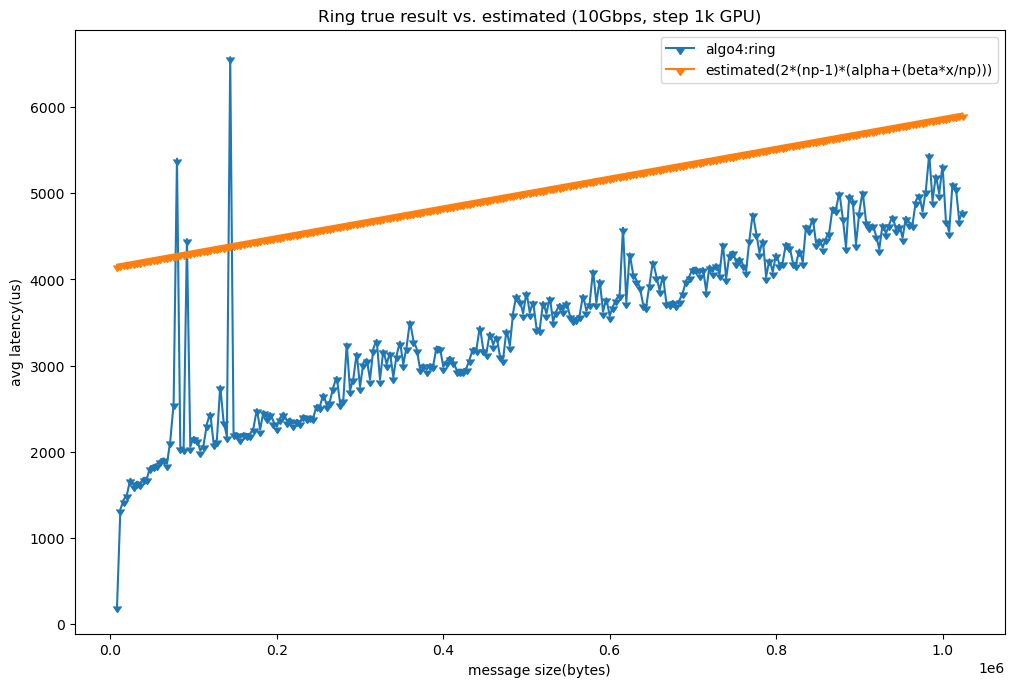

mse is:2752164.3236304577


In [5]:


x, y1 = read_algo_with_head('data/gpus/10g-16cpu-algo4-step1k.txt')


plt.title('Ring true result vs. estimated (10Gbps, step 1k GPU)')
plt.xlabel('message size(bytes)')
plt.ylabel('avg latency(us)')

plt.plot(x, y1, label='algo4:ring', marker=11)


# plt.legend()
# plt.show()


alpha = intercept
beta = slope


# # reduce+braodcast
# # x2 = [2**x for x in range(2,29)]
# y2 = 2*(alpha+beta*x) # ignore computational cost per byte (+ np*message_size*gamma)
num_processes=16

# ring
y2 = 2 * (num_processes-1) * (alpha+(x*beta)/num_processes) # ingore (num_processes-1)*(x*gamma/num_processes)

# plt.plot(x, y2, label='estimated', marker=11)
plt.plot(x, y2, label='estimated(2*(np-1)*(alpha+(beta*x/np)))', marker=11)
plt.legend()

plt.show()

mse = np.square(np.subtract(y1,y2)).mean() 
print('mse is:'+str(mse))

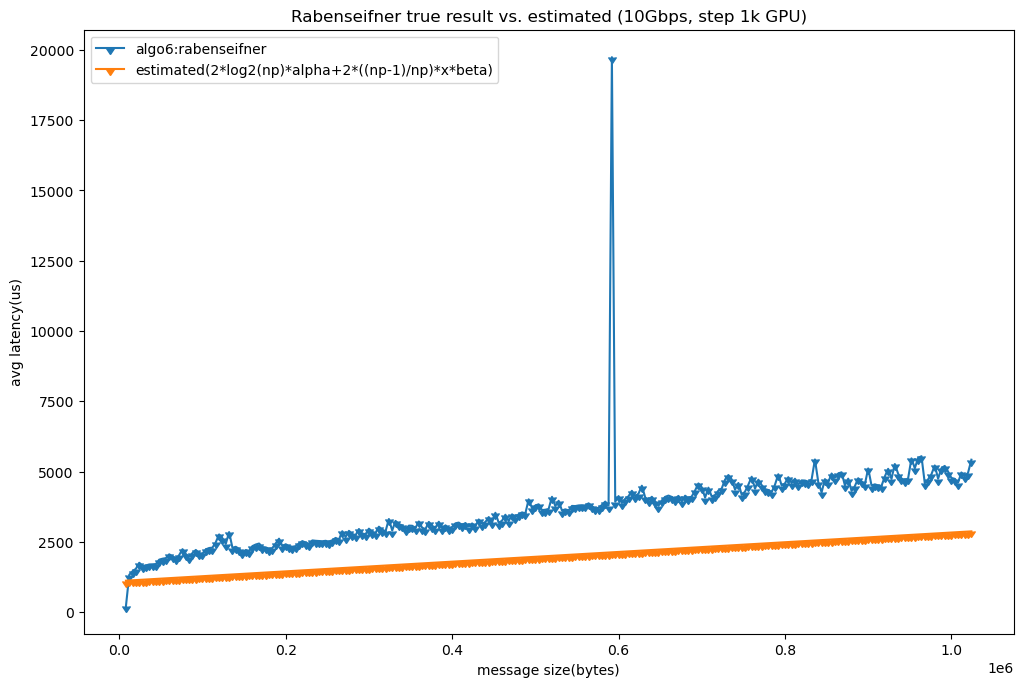

mse is:3957668.723158647


In [6]:


x, y1 = read_algo_with_head('data/gpus/10g-16cpu-algo6-step1k.txt')


plt.title('Rabenseifner true result vs. estimated (10Gbps, step 1k GPU)')
plt.xlabel('message size(bytes)')
plt.ylabel('avg latency(us)')

plt.plot(x, y1, label='algo6:rabenseifner', marker=11)


# plt.legend()
# plt.show()


alpha = intercept
beta = slope


# # reduce+braodcast
# # x2 = [2**x for x in range(2,29)]
# y2 = 2*(alpha+beta*x) # ignore computational cost per byte (+ np*message_size*gamma)
num_processes=16

# # ring
# y2 = 2 * (num_processes-1) * (alpha+(x*beta)/num_processes) # ingore (num_processes-1)*(x*gamma/num_processes)

# rabenseifner
y2 = 2*np.log2(num_processes)*alpha+2*((num_processes-1)/num_processes)*x*beta

plt.plot(x, y2, label='estimated(2*log2(np)*alpha+2*((np-1)/np)*x*beta)', marker=11)
plt.legend()

plt.show()

mse = np.square(np.subtract(y1,y2)).mean() 
print('mse is:'+str(mse))

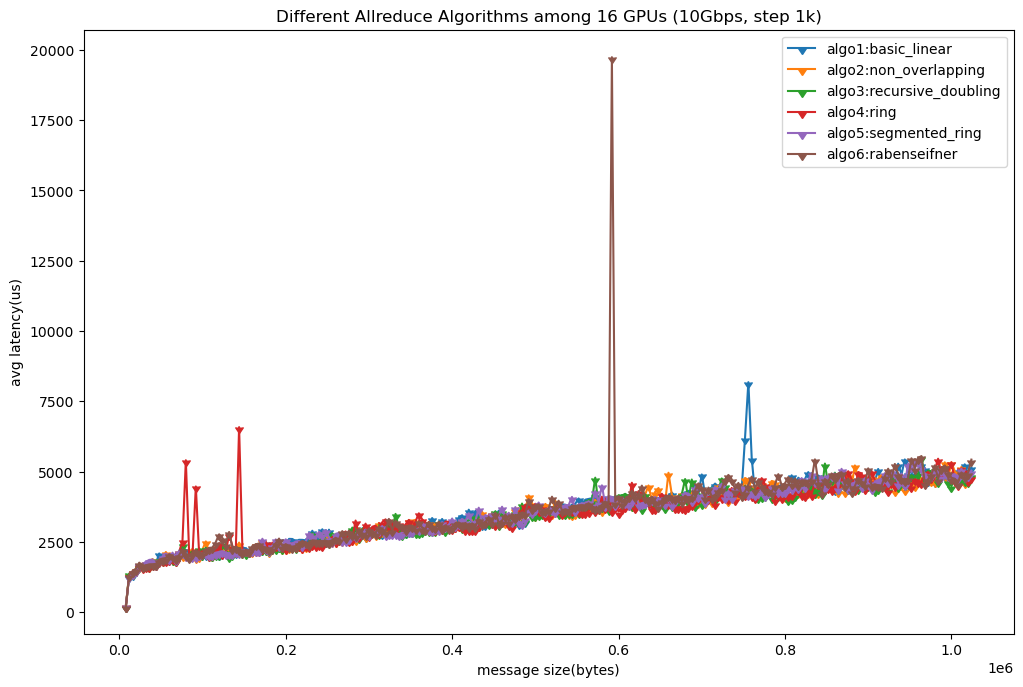

In [11]:
x, y1 = read_algo_with_head('data/gpus/10g-16cpu-algo1-step1k.txt')
_, y2 = read_algo_with_head('data/gpus/10g-16cpu-algo2-step1k.txt')
_, y3 = read_algo_with_head('data/gpus/10g-16cpu-algo3-step1k.txt')
_, y4 = read_algo_with_head('data/gpus/10g-16cpu-algo4-step1k.txt')
_, y5 = read_algo_with_head('data/gpus/10g-16cpu-algo5-step1k.txt')
_, y6 = read_algo_with_head('data/gpus/10g-16cpu-algo6-step1k.txt')

plt.title('Different Allreduce Algorithms among 16 GPUs (10Gbps, step 1k)')
plt.xlabel('message size(bytes)')
plt.ylabel('avg latency(us)')

plt.plot(x, y1, label='algo1:basic_linear', marker=11)
plt.plot(x, y2, label='algo2:non_overlapping', marker=11)
plt.plot(x, y3, label='algo3:recursive_doubling', marker=11)
plt.plot(x, y4, label='algo4:ring', marker=11)
plt.plot(x, y5, label='algo5:segmented_ring', marker=11)
plt.plot(x, y6, label='algo6:rabenseifner', marker=11)

plt.legend()
plt.show()

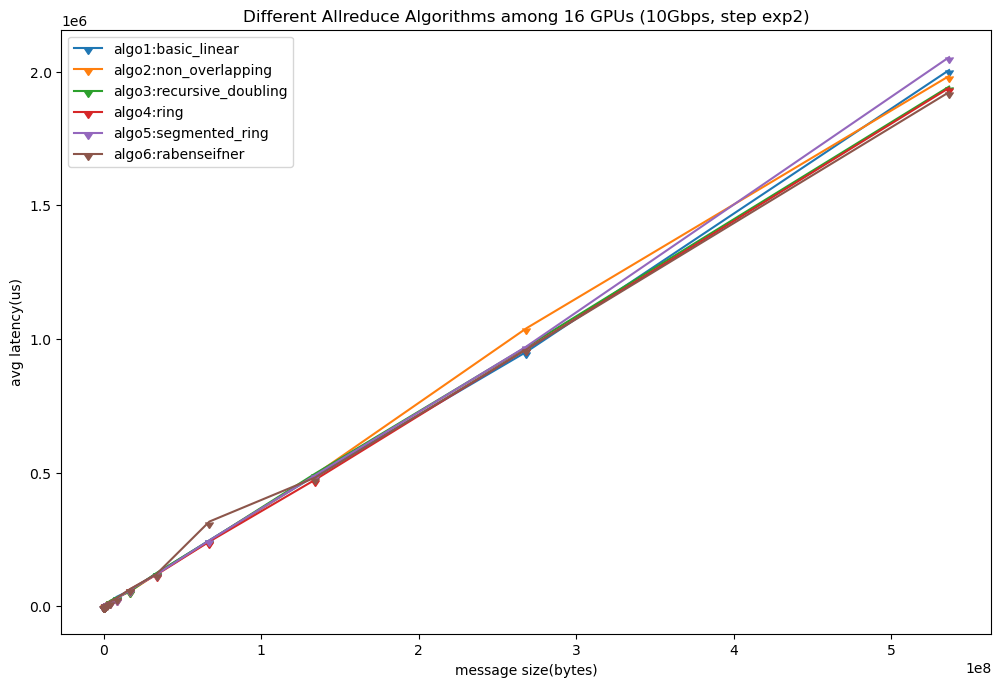

In [12]:
x, y1 = read_algo_with_head('data/gpus/10g-16cpu-algo1-stepexp2.txt')
_, y2 = read_algo_with_head('data/gpus/10g-16cpu-algo2-stepexp2.txt')
_, y3 = read_algo_with_head('data/gpus/10g-16cpu-algo3-stepexp2.txt')
_, y4 = read_algo_with_head('data/gpus/10g-16cpu-algo4-stepexp2.txt')
_, y5 = read_algo_with_head('data/gpus/10g-16cpu-algo5-stepexp2.txt')
_, y6 = read_algo_with_head('data/gpus/10g-16cpu-algo6-stepexp2.txt')

plt.title('Different Allreduce Algorithms among 16 GPUs (10Gbps, step exp2)')
plt.xlabel('message size(bytes)')
plt.ylabel('avg latency(us)')

plt.plot(x, y1, label='algo1:basic_linear', marker=11)
plt.plot(x, y2, label='algo2:non_overlapping', marker=11)
plt.plot(x, y3, label='algo3:recursive_doubling', marker=11)
plt.plot(x, y4, label='algo4:ring', marker=11)
plt.plot(x, y5, label='algo5:segmented_ring', marker=11)
plt.plot(x, y6, label='algo6:rabenseifner', marker=11)

plt.legend()
plt.show()

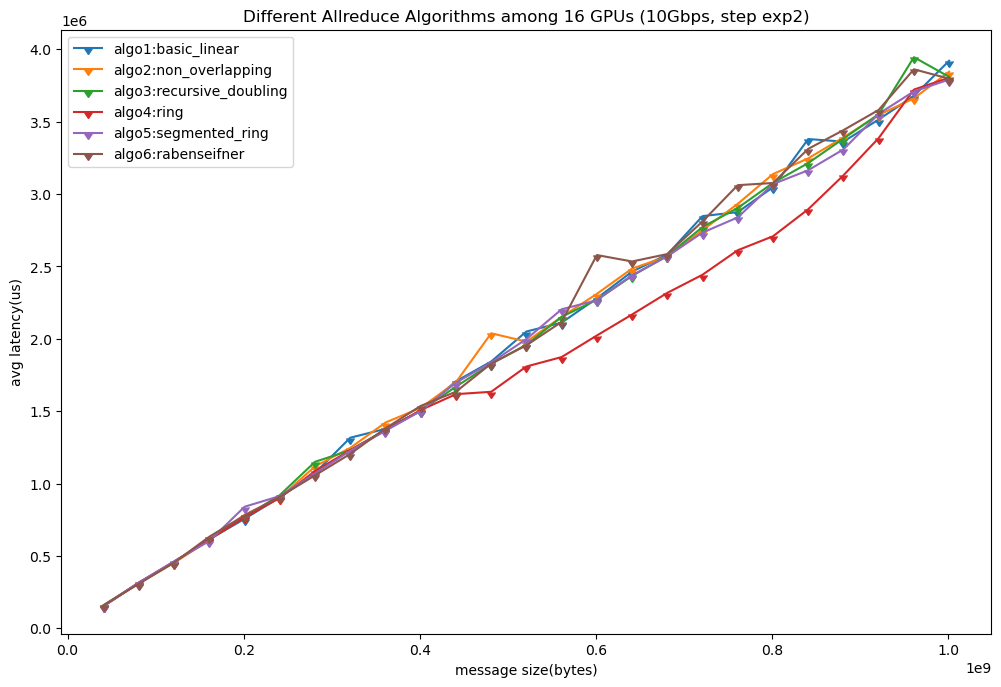

In [13]:
x, y1 = read_algo_with_head('data/gpus/10g-16cpu-algo1-step10m.txt')
_, y2 = read_algo_with_head('data/gpus/10g-16cpu-algo2-step10m.txt')
_, y3 = read_algo_with_head('data/gpus/10g-16cpu-algo3-step10m.txt')
_, y4 = read_algo_with_head('data/gpus/10g-16cpu-algo4-step10m.txt')
_, y5 = read_algo_with_head('data/gpus/10g-16cpu-algo5-step10m.txt')
_, y6 = read_algo_with_head('data/gpus/10g-16cpu-algo6-step10m.txt')

plt.title('Different Allreduce Algorithms among 16 GPUs (10Gbps, step exp2)')
plt.xlabel('message size(bytes)')
plt.ylabel('avg latency(us)')

plt.plot(x, y1, label='algo1:basic_linear', marker=11)
plt.plot(x, y2, label='algo2:non_overlapping', marker=11)
plt.plot(x, y3, label='algo3:recursive_doubling', marker=11)
plt.plot(x, y4, label='algo4:ring', marker=11)
plt.plot(x, y5, label='algo5:segmented_ring', marker=11)
plt.plot(x, y6, label='algo6:rabenseifner', marker=11)

plt.legend()
plt.show()

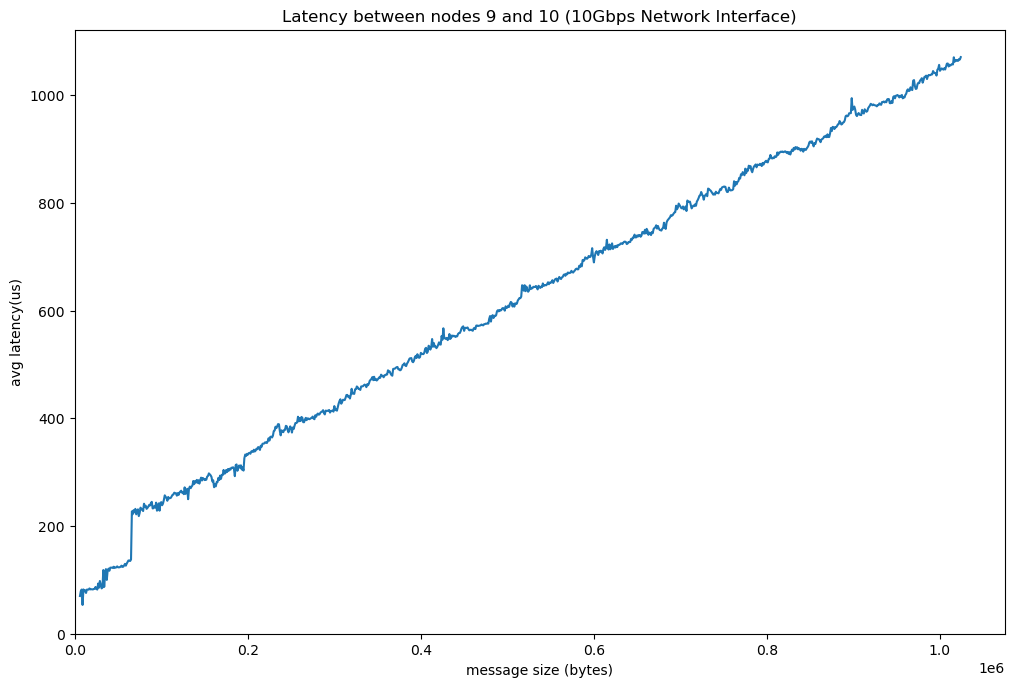

alpha=138.6022474746783
beta=0.0009206472558891672
estimated bandwidth=1086.1923430534678


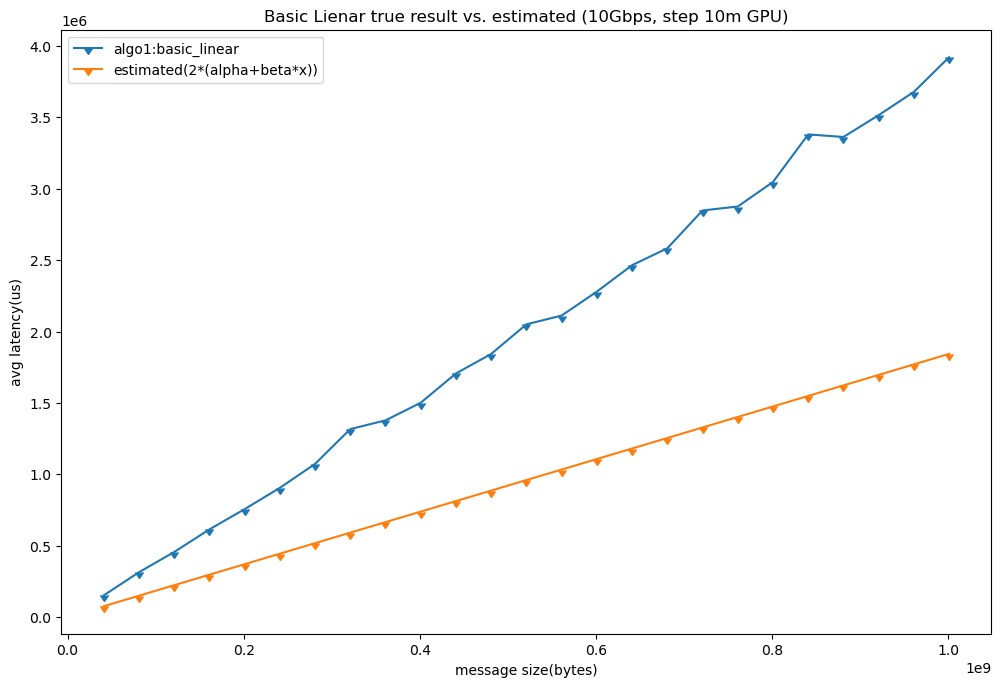

mse is:1437185750333.3696


In [8]:
x = []
y = []

with open('data/lat-10g-step1k-modified.txt') as f:
    for _ in range(4):
        next(f)
    
    for i in f:
        num = i.split()
        x.append(float(num[0]))
        y.append(float(num[1]))
        
# print(x)
# print(y)
        
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

plt.plot(x, y)

plt.xlabel('message size (bytes)')
plt.ylabel('avg latency(us)')
plt.title('Latency between nodes 9 and 10 (10Gbps Network Interface)')
plt.ylim(0)
plt.xlim(0)

# plt.legend()
plt.savefig('imgs/lat-10g-step1k-modified.png')
plt.show()

slope, intercept = np.polyfit(x,y,1)
print("alpha="+str(intercept))
print("beta="+str(slope))
print("estimated bandwidth="+str(1/slope))




def read_algo_with_head(filename):
    x = []
    y = []

    with open(filename) as f:
        for _ in range(4):
            next(f)
    
        for line in f:
            num = line.split()
            x.append(num[0])
            y.append(num[1])

    x = np.array(x)
    y = np.array(y)

    return x.astype('float'), y.astype('float')

x, y1 = read_algo_with_head('data/gpus/10g-16cpu-algo1-step10m.txt')


plt.title('Basic Lienar true result vs. estimated (10Gbps, step 10m GPU)')
plt.xlabel('message size(bytes)')
plt.ylabel('avg latency(us)')

plt.plot(x, y1, label='algo1:basic_linear', marker=11)


# plt.legend()
# plt.show()


alpha = intercept
beta = slope


# reduce+braodcast
# x2 = [2**x for x in range(2,29)]
y2 = 2*(alpha+beta*x) # ignore computational cost per byte (+ np*message_size*gamma)

plt.plot(x, y2, label='estimated(2*(alpha+beta*x))', marker=11)
plt.legend()

plt.show()

mse = np.square(np.subtract(y1,y2)).mean() 
print('mse is:'+str(mse))

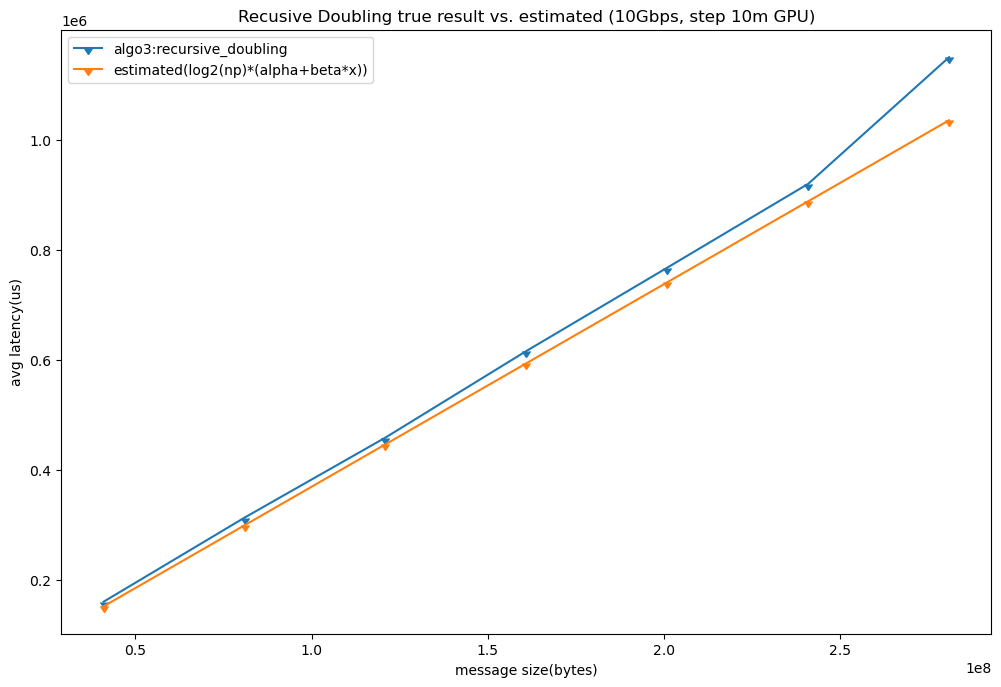

mse is:2253181543.7574153


In [10]:
x, y1 = read_algo_with_head('data/gpus/10g-16cpu-algo3-step10m.txt')


plt.title('Recusive Doubling true result vs. estimated (10Gbps, step 10m GPU)')
plt.xlabel('message size(bytes)')
plt.ylabel('avg latency(us)')

plt.plot(x, y1, label='algo3:recursive_doubling', marker=11)


# plt.legend()
# plt.show()


alpha = intercept
beta = slope


# # reduce+braodcast
# # x2 = [2**x for x in range(2,29)]
# y2 = 2*(alpha+beta*x) # ignore computational cost per byte (+ np*message_size*gamma)
num_processes=16

# # ring
# y2 = 2 * (num_processes-1) * (alpha+(x*beta)/num_processes) # ingore (num_processes-1)*(x*gamma/num_processes)

# recursive doubling
y2 = np.log2(num_processes)*(alpha+beta*x)

plt.plot(x, y2, label='estimated(log2(np)*(alpha+beta*x))', marker=11)
plt.legend()

plt.show()

mse = np.square(np.subtract(y1,y2)).mean() 
print('mse is:'+str(mse))

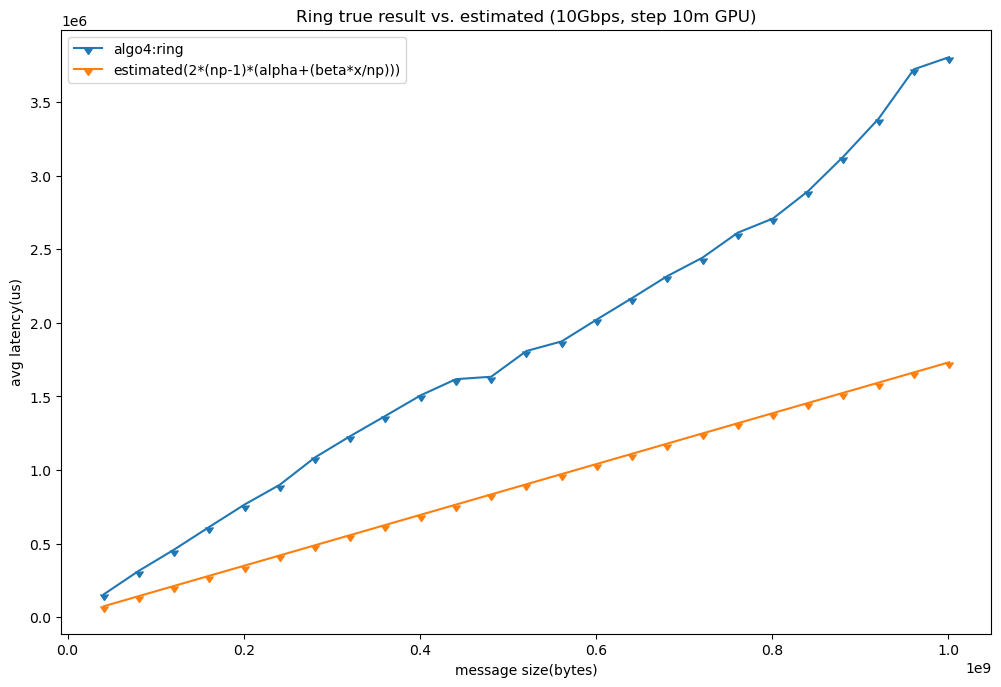

mse is:1209295383614.2876


In [14]:


x, y1 = read_algo_with_head('data/gpus/10g-16cpu-algo4-step10m.txt')


plt.title('Ring true result vs. estimated (10Gbps, step 10m GPU)')
plt.xlabel('message size(bytes)')
plt.ylabel('avg latency(us)')

plt.plot(x, y1, label='algo4:ring', marker=11)


# plt.legend()
# plt.show()


alpha = intercept
beta = slope


# # reduce+braodcast
# # x2 = [2**x for x in range(2,29)]
# y2 = 2*(alpha+beta*x) # ignore computational cost per byte (+ np*message_size*gamma)
num_processes=16

# ring
y2 = 2 * (num_processes-1) * (alpha+(x*beta)/num_processes) # ingore (num_processes-1)*(x*gamma/num_processes)

# plt.plot(x, y2, label='estimated', marker=11)
plt.plot(x, y2, label='estimated(2*(np-1)*(alpha+(beta*x/np)))', marker=11)
plt.legend()

plt.show()

mse = np.square(np.subtract(y1,y2)).mean() 
print('mse is:'+str(mse))

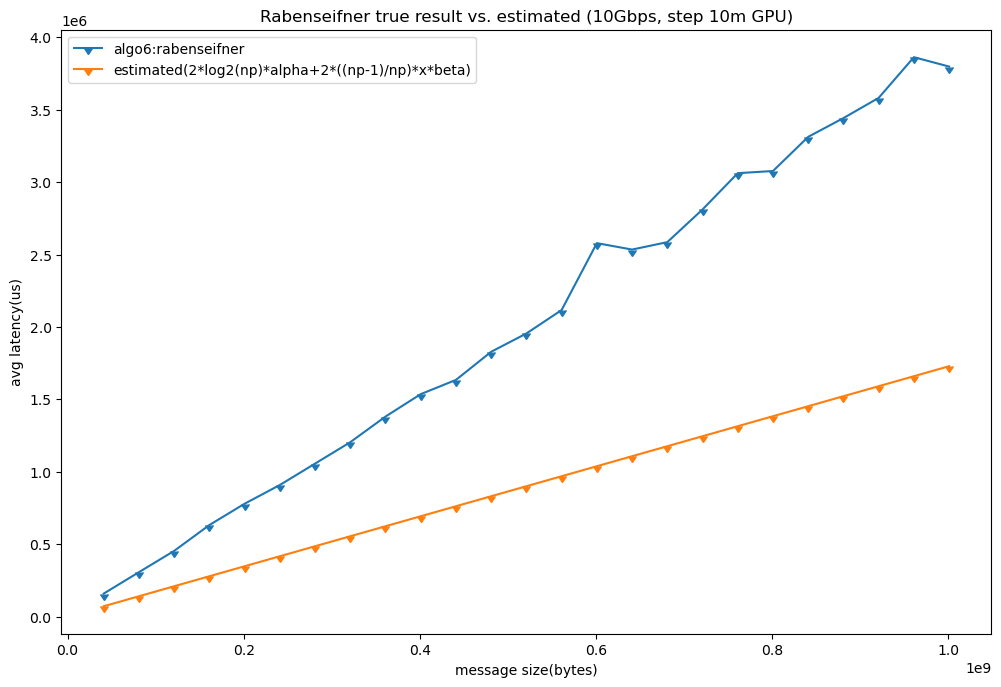

mse is:1674172575895.3914


In [15]:


x, y1 = read_algo_with_head('data/gpus/10g-16cpu-algo6-step10m.txt')


plt.title('Rabenseifner true result vs. estimated (10Gbps, step 10m GPU)')
plt.xlabel('message size(bytes)')
plt.ylabel('avg latency(us)')

plt.plot(x, y1, label='algo6:rabenseifner', marker=11)


# plt.legend()
# plt.show()


alpha = intercept
beta = slope


# # reduce+braodcast
# # x2 = [2**x for x in range(2,29)]
# y2 = 2*(alpha+beta*x) # ignore computational cost per byte (+ np*message_size*gamma)
num_processes=16

# # ring
# y2 = 2 * (num_processes-1) * (alpha+(x*beta)/num_processes) # ingore (num_processes-1)*(x*gamma/num_processes)

# rabenseifner
y2 = 2*np.log2(num_processes)*alpha+2*((num_processes-1)/num_processes)*x*beta

plt.plot(x, y2, label='estimated(2*log2(np)*alpha+2*((np-1)/np)*x*beta)', marker=11)
plt.legend()

plt.show()

mse = np.square(np.subtract(y1,y2)).mean() 
print('mse is:'+str(mse))

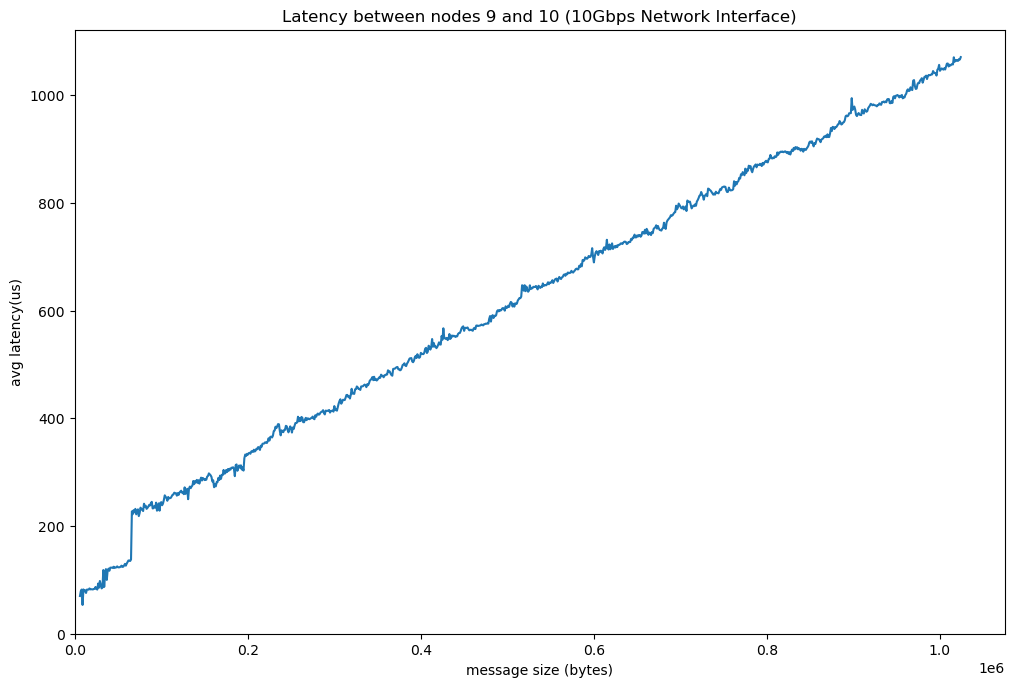

alpha=138.6022474746783
beta=0.0009206472558891672
estimated bandwidth=1086.1923430534678


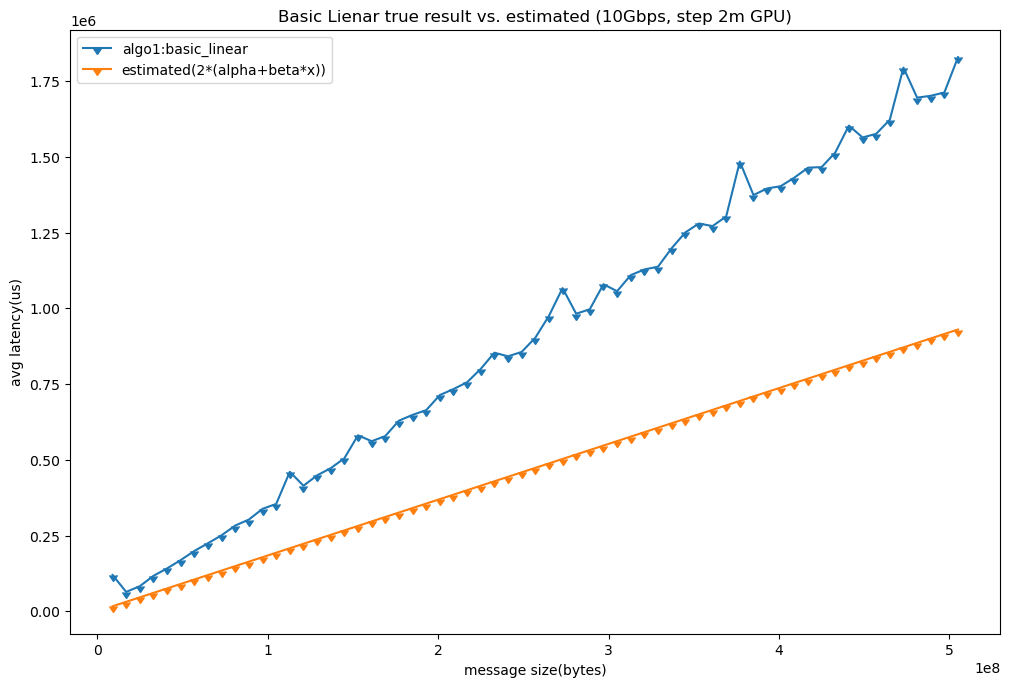

mse is:255656333853.74747


In [7]:

x = []
y = []

with open('data/lat-10g-step1k-modified.txt') as f:
    for _ in range(4):
        next(f)
    
    for i in f:
        num = i.split()
        x.append(float(num[0]))
        y.append(float(num[1]))
        
# print(x)
# print(y)
        
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

plt.plot(x, y)

plt.xlabel('message size (bytes)')
plt.ylabel('avg latency(us)')
plt.title('Latency between nodes 9 and 10 (10Gbps Network Interface)')
plt.ylim(0)
plt.xlim(0)

# plt.legend()
plt.savefig('imgs/lat-10g-step1k-modified.png')
plt.show()

slope, intercept = np.polyfit(x,y,1)
print("alpha="+str(intercept))
print("beta="+str(slope))
print("estimated bandwidth="+str(1/slope))




def read_algo_with_head(filename):
    x = []
    y = []

    with open(filename) as f:
        for _ in range(4):
            next(f)
    
        for line in f:
            num = line.split()
            x.append(num[0])
            y.append(num[1])

    x = np.array(x)
    y = np.array(y)

    return x.astype('float'), y.astype('float')

x, y1 = read_algo_with_head('data/gpus/10g-16p-algo1-step2m.txt')


plt.title('Basic Lienar true result vs. estimated (10Gbps, step 2m GPU)')
plt.xlabel('message size(bytes)')
plt.ylabel('avg latency(us)')

plt.plot(x, y1, label='algo1:basic_linear', marker=11)


# plt.legend()
# plt.show()


alpha = intercept
beta = slope


# reduce+braodcast
# x2 = [2**x for x in range(2,29)]
y2 = 2*(alpha+beta*x) # ignore computational cost per byte (+ np*message_size*gamma)

plt.plot(x, y2, label='estimated(2*(alpha+beta*x))', marker=11)
plt.legend()

plt.show()

mse = np.square(np.subtract(y1,y2)).mean() 
print('mse is:'+str(mse))

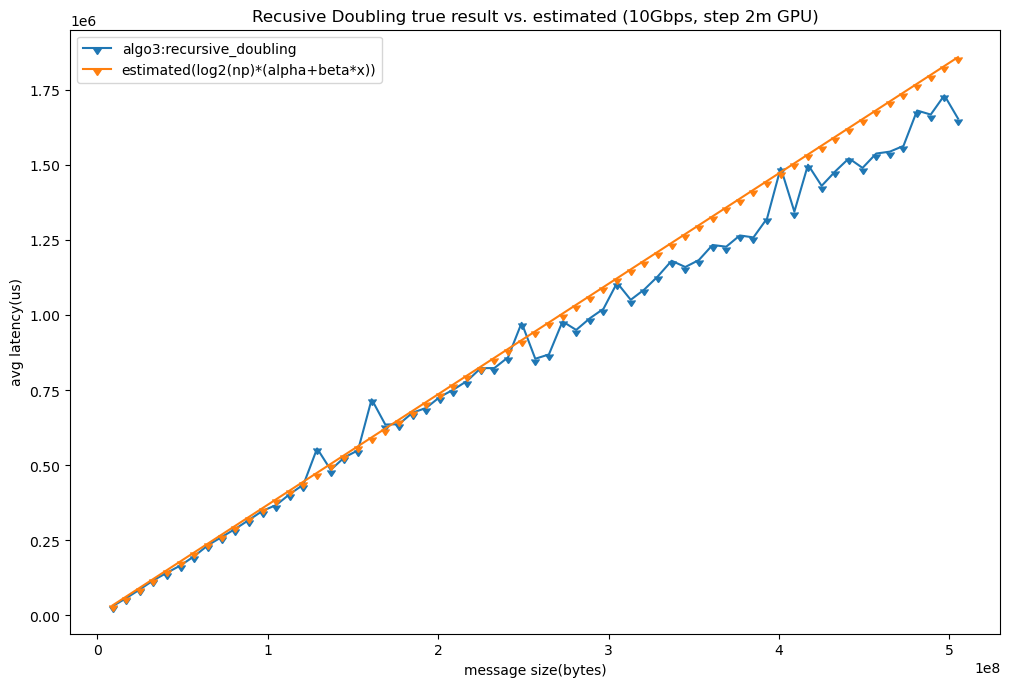

mse is:7305179127.79367


In [3]:
x, y1 = read_algo_with_head('data/gpus/10g-16p-algo3-step2m.txt')


plt.title('Recusive Doubling true result vs. estimated (10Gbps, step 2m GPU)')
plt.xlabel('message size(bytes)')
plt.ylabel('avg latency(us)')

plt.plot(x, y1, label='algo3:recursive_doubling', marker=11)


# plt.legend()
# plt.show()


alpha = intercept
beta = slope


# # reduce+braodcast
# # x2 = [2**x for x in range(2,29)]
# y2 = 2*(alpha+beta*x) # ignore computational cost per byte (+ np*message_size*gamma)
num_processes=16

# # ring
# y2 = 2 * (num_processes-1) * (alpha+(x*beta)/num_processes) # ingore (num_processes-1)*(x*gamma/num_processes)

# recursive doubling
y2 = np.log2(num_processes)*(alpha+beta*x)

plt.plot(x, y2, label='estimated(log2(np)*(alpha+beta*x))', marker=11)
plt.legend()

plt.show()

mse = np.square(np.subtract(y1,y2)).mean() 
print('mse is:'+str(mse))

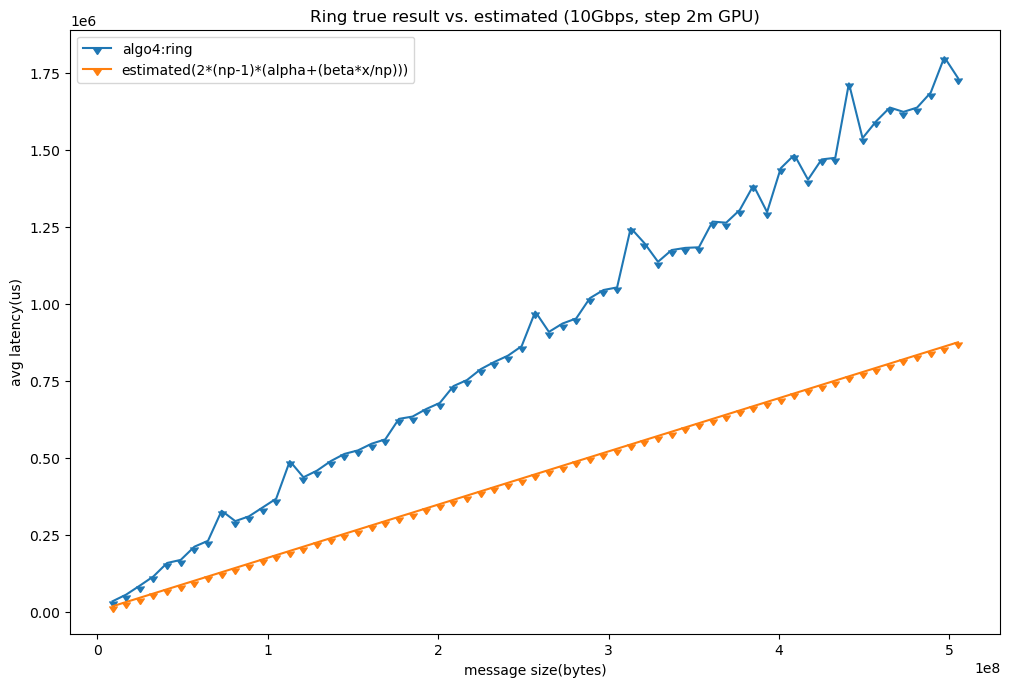

mse is:273472980758.6602


In [4]:


x, y1 = read_algo_with_head('data/gpus/10g-16p-algo4-step2m.txt')


plt.title('Ring true result vs. estimated (10Gbps, step 2m GPU)')
plt.xlabel('message size(bytes)')
plt.ylabel('avg latency(us)')

plt.plot(x, y1, label='algo4:ring', marker=11)


# plt.legend()
# plt.show()


alpha = intercept
beta = slope


# # reduce+braodcast
# # x2 = [2**x for x in range(2,29)]
# y2 = 2*(alpha+beta*x) # ignore computational cost per byte (+ np*message_size*gamma)
num_processes=16

# ring
y2 = 2 * (num_processes-1) * (alpha+(x*beta)/num_processes) # ingore (num_processes-1)*(x*gamma/num_processes)

# plt.plot(x, y2, label='estimated', marker=11)
plt.plot(x, y2, label='estimated(2*(np-1)*(alpha+(beta*x/np)))', marker=11)
plt.legend()

plt.show()

mse = np.square(np.subtract(y1,y2)).mean() 
print('mse is:'+str(mse))

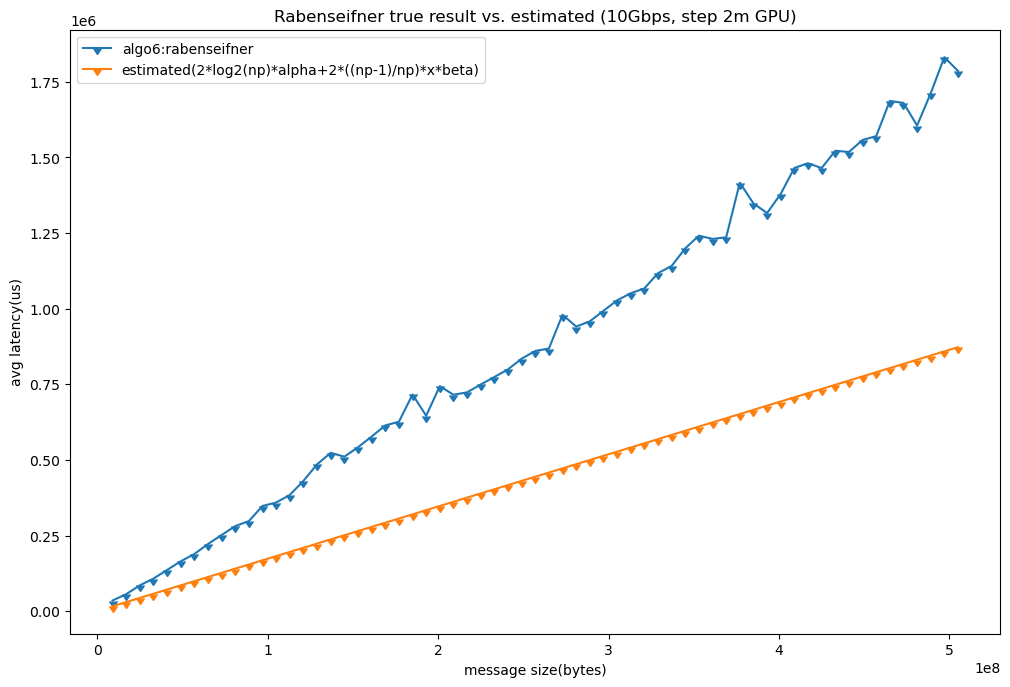

mse is:267132521933.6636


In [6]:


x, y1 = read_algo_with_head('data/gpus/10g-16p-algo6-step2m.txt')


plt.title('Rabenseifner true result vs. estimated (10Gbps, step 2m GPU)')
plt.xlabel('message size(bytes)')
plt.ylabel('avg latency(us)')

plt.plot(x, y1, label='algo6:rabenseifner', marker=11)


# plt.legend()
# plt.show()


alpha = intercept
beta = slope


# # reduce+braodcast
# # x2 = [2**x for x in range(2,29)]
# y2 = 2*(alpha+beta*x) # ignore computational cost per byte (+ np*message_size*gamma)
num_processes=16

# # ring
# y2 = 2 * (num_processes-1) * (alpha+(x*beta)/num_processes) # ingore (num_processes-1)*(x*gamma/num_processes)

# rabenseifner
y2 = 2*np.log2(num_processes)*alpha+2*((num_processes-1)/num_processes)*x*beta

plt.plot(x, y2, label='estimated(2*log2(np)*alpha+2*((np-1)/np)*x*beta)', marker=11)
plt.legend()

plt.show()

mse = np.square(np.subtract(y1,y2)).mean() 
print('mse is:'+str(mse))

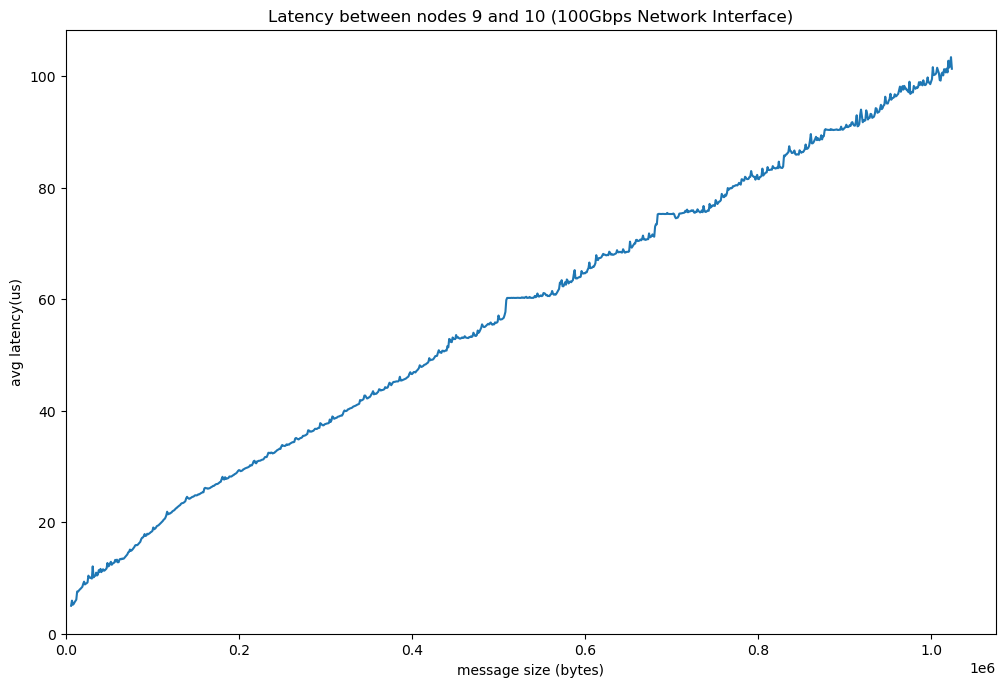

alpha=10.240695884855938
beta=9.058193525602259e-05
estimated bandwidth=11039.728806561485


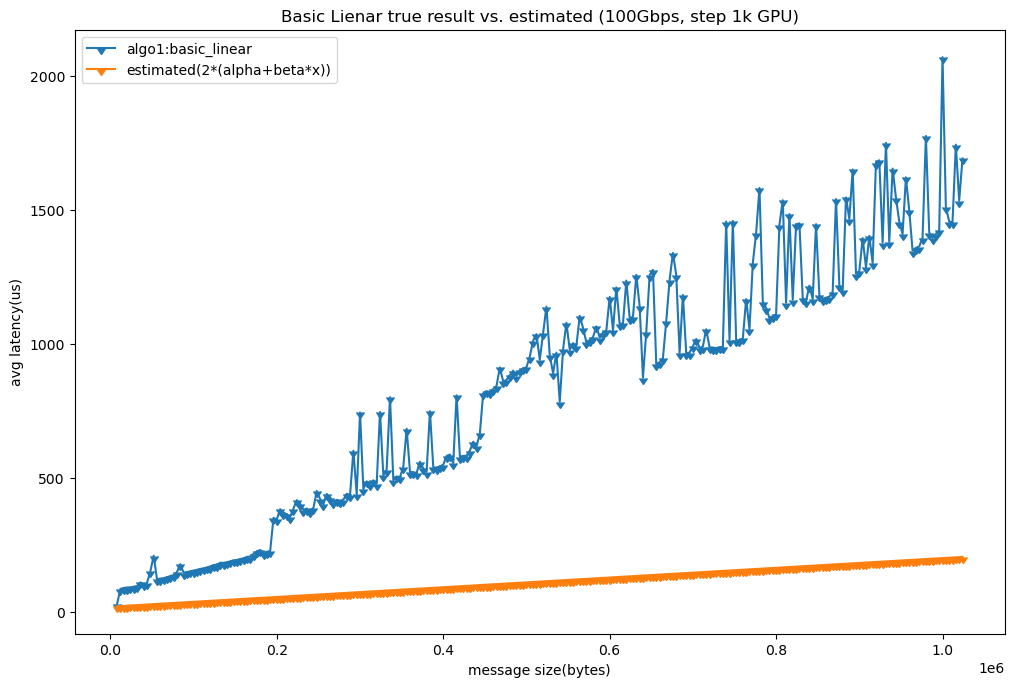

mse is:692410.0952437198


In [14]:

x = []
y = []

with open('data/lat-100g-step1k.txt') as f:
    for _ in range(4):
        next(f)
    
    for i in f:
        num = i.split()
        x.append(float(num[0]))
        y.append(float(num[1]))
        
# print(x)
# print(y)
        
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

plt.plot(x, y)

plt.xlabel('message size (bytes)')
plt.ylabel('avg latency(us)')
plt.title('Latency between nodes 9 and 10 (100Gbps Network Interface)')
plt.ylim(0)
plt.xlim(0)

# plt.legend()
plt.savefig('imgs/lat-100g-step1k.png')
plt.show()

slope, intercept = np.polyfit(x,y,1)
print("alpha="+str(intercept))
print("beta="+str(slope))
print("estimated bandwidth="+str(1/slope))




def read_algo_with_head(filename):
    x = []
    y = []

    with open(filename) as f:
        for _ in range(4):
            next(f)
    
        for line in f:
            num = line.split()
            x.append(num[0])
            y.append(num[1])

    x = np.array(x)
    y = np.array(y)

    return x.astype('float'), y.astype('float')

x, y1 = read_algo_with_head('data/gpus/100g-16cpu-algo1-step1k.txt')


plt.title('Basic Lienar true result vs. estimated (100Gbps, step 1k GPU)')
plt.xlabel('message size(bytes)')
plt.ylabel('avg latency(us)')

plt.plot(x, y1, label='algo1:basic_linear', marker=11)


# plt.legend()
# plt.show()


alpha = intercept
beta = slope


# reduce+braodcast
# x2 = [2**x for x in range(2,29)]
y2 = 2*(alpha+beta*x) # ignore computational cost per byte (+ np*message_size*gamma)

plt.plot(x, y2, label='estimated(2*(alpha+beta*x))', marker=11)
plt.legend()

plt.show()

mse = np.square(np.subtract(y1,y2)).mean() 
print('mse is:'+str(mse))

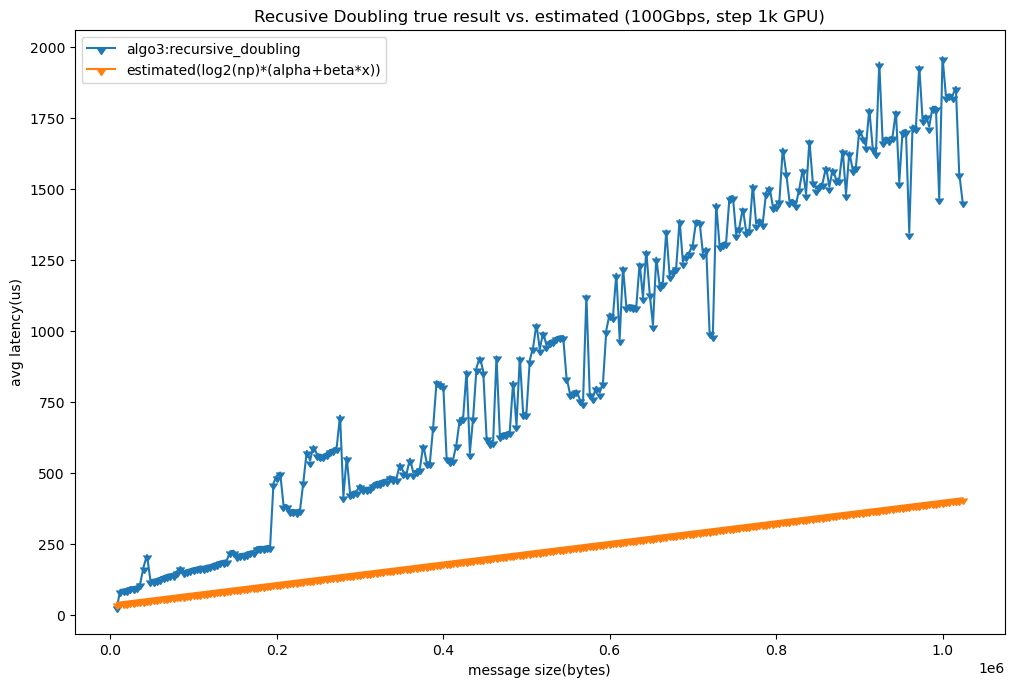

mse is:648004.0409497541


In [15]:
x, y1 = read_algo_with_head('data/gpus/100g-16cpu-algo3-step1k.txt')


plt.title('Recusive Doubling true result vs. estimated (100Gbps, step 1k GPU)')
plt.xlabel('message size(bytes)')
plt.ylabel('avg latency(us)')

plt.plot(x, y1, label='algo3:recursive_doubling', marker=11)


# plt.legend()
# plt.show()


alpha = intercept
beta = slope


# # reduce+braodcast
# # x2 = [2**x for x in range(2,29)]
# y2 = 2*(alpha+beta*x) # ignore computational cost per byte (+ np*message_size*gamma)
num_processes=16

# # ring
# y2 = 2 * (num_processes-1) * (alpha+(x*beta)/num_processes) # ingore (num_processes-1)*(x*gamma/num_processes)

# recursive doubling
y2 = np.log2(num_processes)*(alpha+beta*x)

plt.plot(x, y2, label='estimated(log2(np)*(alpha+beta*x))', marker=11)
plt.legend()

plt.show()

mse = np.square(np.subtract(y1,y2)).mean() 
print('mse is:'+str(mse))

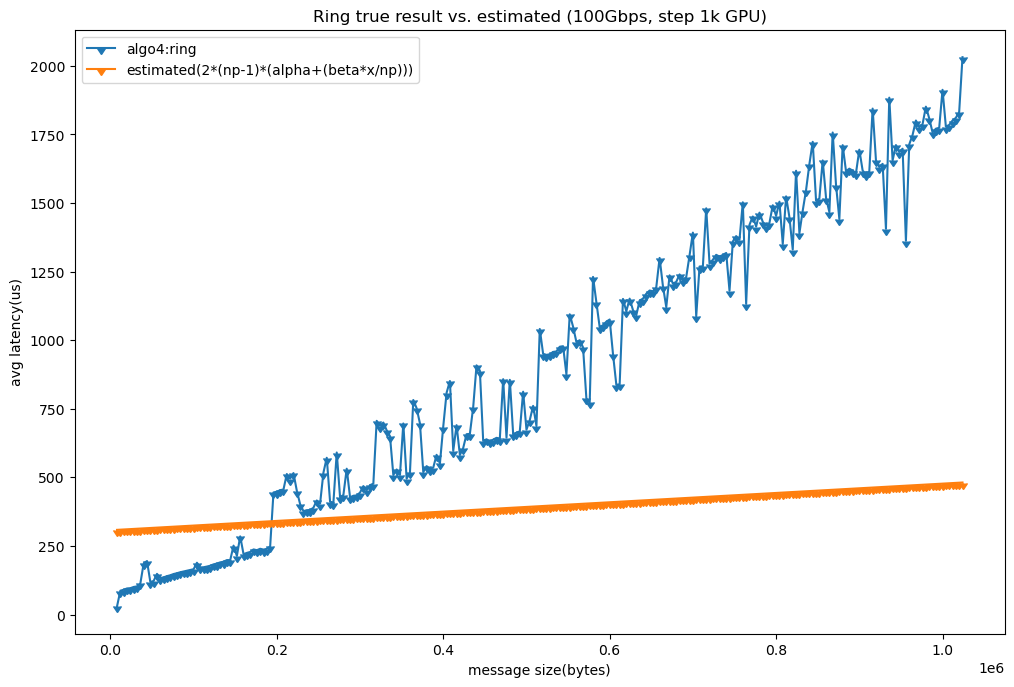

mse is:510378.3981286098


In [16]:


x, y1 = read_algo_with_head('data/gpus/100g-16cpu-algo4-step1k.txt')


plt.title('Ring true result vs. estimated (100Gbps, step 1k GPU)')
plt.xlabel('message size(bytes)')
plt.ylabel('avg latency(us)')

plt.plot(x, y1, label='algo4:ring', marker=11)


# plt.legend()
# plt.show()


alpha = intercept
beta = slope


# # reduce+braodcast
# # x2 = [2**x for x in range(2,29)]
# y2 = 2*(alpha+beta*x) # ignore computational cost per byte (+ np*message_size*gamma)
num_processes=16

# ring
y2 = 2 * (num_processes-1) * (alpha+(x*beta)/num_processes) # ingore (num_processes-1)*(x*gamma/num_processes)

# plt.plot(x, y2, label='estimated', marker=11)
plt.plot(x, y2, label='estimated(2*(np-1)*(alpha+(beta*x/np)))', marker=11)
plt.legend()

plt.show()

mse = np.square(np.subtract(y1,y2)).mean() 
print('mse is:'+str(mse))

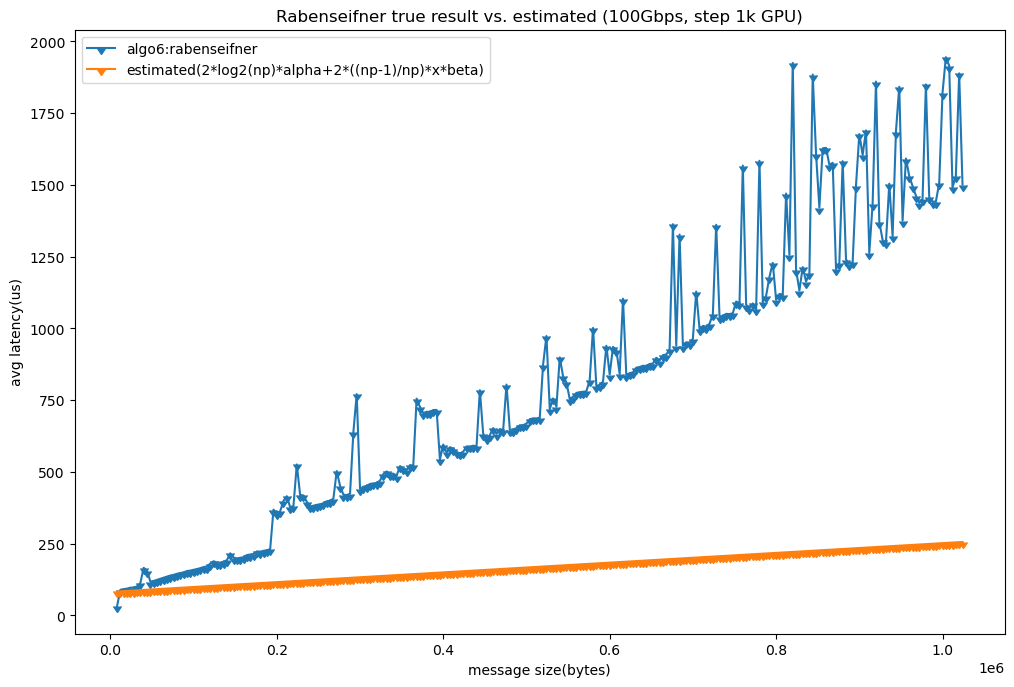

mse is:586729.5851810821


In [17]:


x, y1 = read_algo_with_head('data/gpus/100g-16cpu-algo6-step1k.txt')


plt.title('Rabenseifner true result vs. estimated (100Gbps, step 1k GPU)')
plt.xlabel('message size(bytes)')
plt.ylabel('avg latency(us)')

plt.plot(x, y1, label='algo6:rabenseifner', marker=11)


# plt.legend()
# plt.show()


alpha = intercept
beta = slope


# # reduce+braodcast
# # x2 = [2**x for x in range(2,29)]
# y2 = 2*(alpha+beta*x) # ignore computational cost per byte (+ np*message_size*gamma)
num_processes=16

# # ring
# y2 = 2 * (num_processes-1) * (alpha+(x*beta)/num_processes) # ingore (num_processes-1)*(x*gamma/num_processes)

# rabenseifner
y2 = 2*np.log2(num_processes)*alpha+2*((num_processes-1)/num_processes)*x*beta

plt.plot(x, y2, label='estimated(2*log2(np)*alpha+2*((np-1)/np)*x*beta)', marker=11)
plt.legend()

plt.show()

mse = np.square(np.subtract(y1,y2)).mean() 
print('mse is:'+str(mse))